<a href="https://colab.research.google.com/github/ghina2111/Recommender_Content_Based_Filtering/blob/main/Copy_of_RecommenderBaru_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages**

In [ ]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tabulate
from tensorflow.keras import layers
#from recsysNN_utils import *
pd.set_option("display.precision", 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
top10_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/top10.csv")
bygenre_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/bygenre.csv")
top10_df

,Places ID,num ratings,ave rating,nama,kategori
0,56,10,4.0,Solo Safari,Zoo
1,49,10,4.5,Pura Mangkunegaran,Historical
2,24,10,5.0,Kemuning Sky Hills,Nature & Adventure
3,52,10,3.5,Royal Water Adventure,Waterpark
4,30,9,4.5,Lawu Park Horse Riding,Nature & Adventure
5,35,8,5.0,Lokananta,Museum
6,11,8,5.0,Cepogo Cheese Park,Park
7,43,7,4.0,Nasi Liwet Yu Sani Gemblegan,Food
8,17,7,4.0,Gunung Lawu,Nature & Adventure
9,13,6,4.0,De Tjolomadoe,Museum


In [ ]:
bygenre_df

,kategori,num places,ave rating/kategori,ratings per kategori
0,Nature & Adventure,32,4.5,13.5
1,Food,5,4.0,4.0
2,Zoo,1,4.0,4.0
3,Historical,7,4.5,4.5
4,Museum,10,4.5,9.0
5,Waterpark,7,3.5,3.5
6,Park,4,5.0,5.0


In [ ]:
# Create user_train DataFrame
user_train = pd.DataFrame({
    'user_id': range(1, 11),
    'rating_count': [10, 10, 10, 10, 9, 8, 8, 7, 7, 6],
    'rating_ave': [4.0, 4.5, 5.0, 3.5, 4.5, 4.5, 5.0, 4.0, 4.0, 4.5],
    'Zoo': [4.0, 4.5, 5.0, 3.5, 4.0, 4.5, 5.0, 4.0, 4.5, np.nan],
    'Historical': [4.5, 5.0, 4.5, 4.0, 5.0, 4.5, np.nan, 4.5, 4.0, 4.0],
    'Nature & Adventure': [5.0, 4.5, 4.5, 3.5, 4.5, np.nan, 4.0, 4.0, 4.5, np.nan],
    'Waterpark': [3.5, 4.0, 4.5, 3.5, 4.0, np.nan, np.nan, 4.0, np.nan, np.nan],
    'Museum': [5.0, 4.5, 5.0, 4.0, 4.5, np.nan, 4.5, 4.0, np.nan, np.nan],
    'Food': [4.0, 4.5, 4.5, 3.5, np.nan, 4.5, 4.5, 4.0, 4.5, np.nan],
    'Park': [4.0, 4.5, 5.0, np.nan, 4.0, np.nan, 5.0, np.nan, 4.5, 4.5]
})

# Create item_train DataFrame
item_train = pd.DataFrame({
    'place_id': [56, 49, 24, 52, 30, 35, 11, 43, 17, 13],
    'num_ratings': [10, 10, 10, 10, 9, 8, 8, 7, 7, 6],
    'ave_rating': [4.0, 4.5, 5.0, 3.5, 4.5, 5.0, 5.0, 4.0, 4.0, 4.5],
    'name': ["Solo Safari", "Pura Mangkunegaran", "Kemuning Sky Hills", "Royal Water Adventure", "Lawu Park Horse Riding", "Lokananta", "Cepogo Cheese Park", "Nasi Liwet Yu Sani Gemblegan", "Gunung Lawu", "De Tjolomadoe"],
    'category': ["Zoo", "Historical", "Nature & Adventure", "Waterpark", "Nature & Adventure", "Museum", "Park", "Food", "Nature & Adventure", "Museum"]
})


print("User Train Data:")
print(user_train)
print("\nItem Train Data:")
print(item_train)

User Train Data:
   user_id  rating_count  rating_ave  Zoo  Historical  Nature & Adventure  \
0        1            10         4.0  4.0         4.5                 5.0   
1        2            10         4.5  4.5         5.0                 4.5   
2        3            10         5.0  5.0         4.5                 4.5   
3        4            10         3.5  3.5         4.0                 3.5   
4        5             9         4.5  4.0         5.0                 4.5   
5        6             8         4.5  4.5         4.5                 NaN   
6        7             8         5.0  5.0         NaN                 4.0   
7        8             7         4.0  4.0         4.5                 4.0   
8        9             7         4.0  4.5         4.0                 4.5   
9       10             6         4.5  NaN         4.0                 NaN   

   Waterpark  Museum  Food  Park  
0        3.5     5.0   4.0   4.0  
1        4.0     4.5   4.5   4.5  
2        4.5     5.0   4.5   5

In [ ]:


from sklearn.model_selection import train_test_split

# Split user data terlebih dahulu
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)

# Ekstrak kolom 'rating_ave' sebagai target setelah pembagian
y_train = user_train['rating_ave']
y_test = user_test['rating_ave']

# Hilangkan kolom 'rating_ave' dari data user agar tidak masuk sebagai fitur
user_train = user_train.drop(columns=['rating_ave'])
user_test = user_test.drop(columns=['rating_ave'])

# Lakukan transformasi (misalnya one-hot encoding) setelah splitting
user_train_encoded = pd.get_dummies(user_train, drop_first=True)
user_test_encoded = pd.get_dummies(user_test, drop_first=True)

# Pastikan semua kolom di user_train_encoded dan user_test_encoded konsisten
user_test_encoded = user_test_encoded.reindex(columns=user_train_encoded.columns, fill_value=0)

# Print shapes
print(f"user_train shape: {user_train_encoded.shape}")
print(f"user_test shape: {user_test_encoded.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


user_train shape: (8, 9)
user_test shape: (2, 9)
y_train shape: (8,)
y_test shape: (2,)


In [ ]:
pd.DataFrame.isna(user_train).sum()

,0
user_id,0
rating_count,0
Zoo,0
Historical,1
Nature & Adventure,1
Waterpark,3
Museum,2
Food,1
Park,3


In [ ]:
pd.DataFrame.isna(item_train).sum()

,0
place_id,0
num_ratings,0
ave_rating,0
name,0
category,0


In [ ]:
for col in ['Zoo', 'Historical', 'Nature & Adventure', 'Waterpark', 'Museum', 'Food', 'Park']:
    mode_val = user_train[col].mode()[0]
    user_train.loc[:, col] = user_train[col].fillna(mode_val)

In [ ]:
pd.DataFrame.isna(user_train).sum()

,0
user_id,0
rating_count,0
Zoo,0
Historical,0
Nature & Adventure,0
Waterpark,0
Museum,0
Food,0
Park,0


In [ ]:
# Pisahkan kolom numerik dan non-numerik
numerical_cols = ['num_ratings', 'ave_rating']
non_numerical_cols = ['name', 'category']

In [ ]:
# # 1. Scale kolom numerik
# scalerItem = StandardScaler()
# numerical_scaled = scalerItem.fit_transform(item_train[numerical_cols])

In [ ]:
# # 2. One-hot encode kolom kategorikal
# encoder = OneHotEncoder(sparse_output=False)
# encoded_categories = encoder.fit_transform(item_train[['category']])

In [ ]:
# # 2. One-hot encode kolom kategorikal
# encoder = OneHotEncoder(sparse_output=False)
# encoded_names = encoder.fit_transform(item_train[['name']])

In [ ]:
# # 3. Gabungkan kembali data yang sudah di-encode
# item_train_processed = pd.concat(
#     [
#         pd.DataFrame(numerical_scaled, columns=numerical_cols),
#         pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['category'])),
#         pd.DataFrame(encoded_names, columns=encoder.get_feature_names_out(['name']))
#     ],
#     axis=1
# )

# print(item_train_processed)

In [ ]:
# 1. Scale kolom numerik
scalerItem = StandardScaler()
numerical_scaled = scalerItem.fit_transform(item_train[numerical_cols])

# scaler_user = MinMaxScaler()
# scaler_item = MinMaxScaler()


# user_train_normalized = scaler_user.fit_transform(user_train)
# item_train_normalized = scaler_item.fit_transform(item_train)

# user_test_normalized = scaler_user.transform(user_test)
# item_test_normalized = scaler_item.transform(item_test)

# scaler = StandardScaler()
# user_train_normalized = scaler.fit_transform(user_train)
# item_train_normalized = scaler.fit_transform(item_train)

# 2. One-hot encode kolom kategorikal
encoder_category = OneHotEncoder(sparse_output=False) # Create a separate encoder for category
encoded_categories = encoder_category.fit_transform(item_train[['category']])

encoder_name = OneHotEncoder(sparse_output=False) # Create a separate encoder for name
encoded_names = encoder_name.fit_transform(item_train[['name']])

# 3. Gabungkan kembali data yang sudah di-encode
item_train_processed = pd.concat(
    [
        pd.DataFrame(numerical_scaled, columns=numerical_cols),
        pd.DataFrame(encoded_categories, columns=encoder_category.get_feature_names_out(['category'])), # Use the correct encoder for category
        pd.DataFrame(encoded_names, columns=encoder_name.get_feature_names_out(['name'])) # Use the correct encoder for name
    ],
    axis=1
)

print(item_train_processed)

   num_ratings  ave_rating  category_Food  category_Historical  \
0          1.0        -0.8            0.0                  0.0   
1          1.0         0.2            0.0                  1.0   
2          1.0         1.2            0.0                  0.0   
3          1.0        -1.8            0.0                  0.0   
4          0.3         0.2            0.0                  0.0   
5         -0.3         1.2            0.0                  0.0   
6         -0.3         1.2            0.0                  0.0   
7         -1.0        -0.8            1.0                  0.0   
8         -1.0        -0.8            0.0                  0.0   
9         -1.7         0.2            0.0                  0.0   

   category_Museum  category_Nature & Adventure  category_Park  \
0              0.0                          0.0            0.0   
1              0.0                          0.0            0.0   
2              0.0                          1.0            0.0   
3        

In [ ]:
# Gunakan DataFrame langsung alih-alih memanggil load_data()
# Assign DataFrame yang telah dibuat
item_train = item_train  # Data tempat wisata
user_train = user_train  # Data pengguna

# Contoh 'y_train' dapat dibuat dengan dummy data atau label rating sebenarnya
#y_train = user_train['rating_ave']  # Contoh mengambil rata-rata rating sebagai label target

# Fitur tambahan (bisa disesuaikan dengan model)
item_features = item_train[['category']]
user_features = user_train.drop(columns=['user_id', 'rating_count'])

# Set konfigurasi variabel
num_user_features = user_train.shape[1] - 3  # Menghapus 'userid', 'rating_count', dan 'rating_ave' saat training
num_item_features = item_train.shape[1] - 1  # Menghapus 'place_id' saat training
uvs = 3  # User genre vector start
ivs = 3  # Item genre vector start
u_s = 3  # Kolom awal untuk training pengguna
i_s = 1  # Kolom awal untuk training tempat wisata

print(f"Number of training vectors: {len(item_train)}")

Number of training vectors: 10


In [ ]:
def pprint_train(user_train, user_features, uvs, u_s, maxcount=10):
    """
    Pretty-print training data for debugging or inspection.

    Args:
        user_train: DataFrame of user training data.
        user_features: Features associated with each user.
        uvs: Start index of user genre vector in features.
        u_s: Start index of columns used for training.
        maxcount: Maximum number of rows to print.
    """
    print("User Training Data Preview:")
    print(user_train.head(maxcount))
    print("\nUser Features Preview:")
    print(user_features.iloc[:, uvs:u_s].head(maxcount))  # Slicing based on uvs and u_s

# Menggunakan fungsi
pprint_train(user_train, user_features, uvs, u_s, maxcount=10)


User Training Data Preview:
   user_id  rating_count  Zoo  Historical  Nature & Adventure  Waterpark  \
6        7             8  5.0         4.5                 4.0        4.0   
4        5             9  4.0         5.0                 4.5        4.0   
0        1            10  4.0         4.5                 5.0        3.5   
3        4            10  3.5         4.0                 3.5        3.5   
1        2            10  4.5         5.0                 4.5        4.0   
7        8             7  4.0         4.5                 4.0        4.0   
8        9             7  4.5         4.0                 4.5        4.0   
5        6             8  4.5         4.5                 4.5        4.0   

   Museum  Food  Park  
6     4.5   4.5   5.0  
4     4.5   4.5   4.0  
0     5.0   4.0   4.0  
3     4.0   3.5   4.0  
1     4.5   4.5   4.5  
7     4.0   4.0   4.0  
8     4.5   4.5   4.5  
5     4.5   4.5   4.0  

User Features Preview:
Empty DataFrame
Columns: []
Index: [6, 4, 0, 3,

In [ ]:
def pprint_train(item_train, item_features, ivs, i_s, maxcount=10, user=False):
    """
    Pretty-print training data for debugging or inspection.

    Args:
        user_train: DataFrame of user training data.
        user_features: Features associated with each user.
        uvs: Start index of user genre vector in features.
        u_s: Start index of columns used for training.
        maxcount: Maximum number of rows to print.
    """
    print("User Training Data Preview:")
    print(item_train.head(maxcount))
    print("\nUser Features Preview:")
    print(item_features.iloc[:, ivs:i_s].head(maxcount))  # Slicing based on uvs and u_s

# Menggunakan fungsi
pprint_train(item_train, item_features, ivs, i_s, maxcount=10, user=False)


User Training Data Preview:
   place_id  num_ratings  ave_rating                          name  \
0        56           10         4.0                   Solo Safari   
1        49           10         4.5            Pura Mangkunegaran   
2        24           10         5.0            Kemuning Sky Hills   
3        52           10         3.5         Royal Water Adventure   
4        30            9         4.5        Lawu Park Horse Riding   
5        35            8         5.0                     Lokananta   
6        11            8         5.0            Cepogo Cheese Park   
7        43            7         4.0  Nasi Liwet Yu Sani Gemblegan   
8        17            7         4.0                   Gunung Lawu   
9        13            6         4.5                 De Tjolomadoe   

             category  
0                 Zoo  
1          Historical  
2  Nature & Adventure  
3           Waterpark  
4  Nature & Adventure  
5              Museum  
6                Park  
7        

In [ ]:
print(f"y_train[:10]:\n {y_train[:10]}")

y_train[:10]:
 6    5.0
4    4.5
0    4.0
3    3.5
1    4.5
7    4.0
8    4.0
5    4.5
Name: rating_ave, dtype: float64


In [ ]:
# # scale training data
# item_train_unscaled = item_train
# user_train_unscaled = user_train
# y_train_unscaled    = y_train

# scalerItem = StandardScaler()
# scalerItem.fit(item_train)
# item_train = scalerItem.transform(item_train)

# scalerUser = StandardScaler()
# scalerUser.fit(user_train)
# user_train = scalerUser.transform(user_train)

# scalerTarget = MinMaxScaler((-1, 1))
# scalerTarget.fit(y_train.reshape(-1, 1))
# y_train = scalerTarget.transform(y_train.reshape(-1, 1))
# # ynorm_test = scalerTarget.transform(y_test.reshape(-1, 1))

# print(np.allclose(item_train_unscaled, scalerItem.inverse_transform(item_train)))
# print(np.allclose(user_train_unscaled, scalerUser.inverse_transform(user_train)))

In [ ]:
# item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
# user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
# y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
# print(f"kategori/item training data shape: {item_train.shape}")
# print(f"kategori/item test data shape: {item_test.shape}")

In [ ]:
pprint_train(user_train, user_features, uvs, u_s, maxcount=5)

User Training Data Preview:
   user_id  rating_count  Zoo  Historical  Nature & Adventure  Waterpark  \
6        7             8  5.0         4.5                 4.0        4.0   
4        5             9  4.0         5.0                 4.5        4.0   
0        1            10  4.0         4.5                 5.0        3.5   
3        4            10  3.5         4.0                 3.5        3.5   
1        2            10  4.5         5.0                 4.5        4.0   

   Museum  Food  Park  
6     4.5   4.5   5.0  
4     4.5   4.5   4.0  
0     5.0   4.0   4.0  
3     4.0   3.5   4.0  
1     4.5   4.5   4.5  

User Features Preview:
Empty DataFrame
Columns: []
Index: [6, 4, 0, 3, 1]


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     item_train_processed, y_train, test_size=0.2, random_state=42)

In [ ]:
# model = keras.Sequential([
#     layers.Input(shape=(X_train.shape[1],)),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1)  # Untuk regresi rating
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)


In [ ]:
# num_outputs = 32
# tf.random.set_seed(1)
# user_NN = tf.keras.models.Sequential([
#     ### START CODE HERE ###
#   tf.keras.layers.Dense(256, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_outputs),

#     ### END CODE HERE ###
# ])

# item_NN = tf.keras.models.Sequential([
#     ### START CODE HERE ###
#   tf.keras.layers.Dense(256, activation='relu'),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dense(num_outputs),
#     ### END CODE HERE ###
# ])

# # create the user input and point to the base network
# input_user = tf.keras.layers.Input(shape=(num_user_features,))
# vu = user_NN(input_user)
# vu = tf.linalg.l2_normalize(vu, axis=1)

# # create the item input and point to the base network
# input_item = tf.keras.layers.Input(shape=(num_item_features,))
# vm = item_NN(input_item)
# vm = tf.linalg.l2_normalize(vm, axis=1)

# # compute the dot product of the two vectors vu and vm
# output = tf.keras.layers.Dot(axes=1)([vu, vm])

# # specify the inputs and output of the model
# model = tf.keras.Model([input_user, input_item], output)

# model.summary()

In [ ]:
# user_train_numeric_subset = user_train_numeric.iloc[:4, :7]
# item_train_numeric_subset = item_train_numeric.iloc[:4, :4]

# y_train_subset = np.array([1, 0, 1, 0])

# tf.random.set_seed(1)

# # Define number of features
# num_user_features = user_train_numeric_subset.shape[1]
# num_item_features = item_train_numeric_subset.shape[1]

# num_outputs = 32

# user_NN = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(num_outputs),
# ])

# item_NN = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(num_outputs),
# ])

# # create the user input and point to the base network
# input_user = tf.keras.layers.Input(shape=(num_user_features,))
# vu = user_NN(input_user)

# # Normalize the output using a Lambda layer
# vu = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vu)

# # create the item input and point to the base network
# input_item = tf.keras.layers.Input(shape=(num_item_features,))
# vm = item_NN(input_item)

# # Normalize the output using a Lambda layer
# vm = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vm)

# # compute the dot product of the two vectors vu and vm
# output = tf.keras.layers.Dot(axes=1)([vu, vm])

# # specify the inputs and output of the model
# model = tf.keras.Model([input_user, input_item], output)

# model.summary()

In [ ]:
user_train_numeric = pd.DataFrame({'col1': [1, 2, 3, 4, 5],
                                   'col2': [6, 7, 8, 9, 10],
                                   'col3': [11, 12, 13, 14, 15],
                                   'col4': [16, 17, 18, 19, 20]})
item_train_numeric = pd.DataFrame({'col1': [1, 2, 3, 4, 5],
                                   'col2': [6, 7, 8, 9, 10],
                                   'col3': [11, 12, 13, 14, 15],
                                   'col4': [16, 17, 18, 19, 20]})

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Assuming 'user_train_numeric' and 'item_train_numeric' are defined correctly
# Select data with the correct number of features


# Dummy data untuk memastikan fitur dan label sesuai
num_user_features = 4
num_item_features = 4
num_samples = 100

# Buat data dummy
user_train_numeric = np.random.rand(num_samples, num_user_features).astype('float32')
item_train_numeric = np.random.rand(num_samples, num_item_features).astype('float32')
y_train = np.random.randint(2, size=num_samples).astype('float32')

# Bagi data menjadi train dan test
from sklearn.model_selection import train_test_split
user_train, user_test, item_train, item_test, y_train, y_test = train_test_split(
    user_train_numeric, item_train_numeric, y_train, test_size=0.2, random_state=1
)

# user_train_numeric_subset = user_train_numeric.iloc[:4, :7]  # Adjust features as per model input
# item_train_numeric_subset = item_train_numeric.iloc[:4, :4]

# # Create a sample target variable (adjust based on actual labels)
# y_train_subset = np.array([1, 0, 1, 0])

# # Set random seed for reproducibility
# tf.random.set_seed(1)

# # Define number of features
# num_user_features = user_train_numeric_subset.shape[1]
# num_item_features = item_train_numeric_subset.shape[1]

# Redefine the model (if necessary)
num_outputs = 16
user_NN = tf.keras.models.Sequential([
    #tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_outputs),
])

item_NN = tf.keras.models.Sequential([
    #tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    #tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    #tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    #tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(num_outputs),
])

# User input and base network
input_user = tf.keras.layers.Input(shape=(num_user_features,))
vu = user_NN(input_user)
vu = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vu)

# Item input and base network
input_item = tf.keras.layers.Input(shape=(num_item_features,))
vm = item_NN(input_item)
vm = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vm)

# Dot product of user and item embeddings
output = tf.keras.layers.Dot(axes=1)([vu, vm])

model.summary()

# Create the model
model = tf.keras.Model([input_user, input_item], output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
# model.fit([user_train_numeric_subset, item_train_numeric_subset], y_train_subset, epochs=30)
# Contoh: Batch size lebih kecil
history = model.fit([user_train_normalized, item_train_normalized], y_train,
          epochs=100, batch_size=8, validation_split=0.2)

Model: "functional_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_156           │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_158           │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_78             │ (None, 16)             │          2,928 │ input_layer_156[0][0]  │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_79             │ (None, 16)             │          2,928 │ input_layer_158[0][0]  │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_78 (Lambda)        │ (None, 16)             │              0 │ sequential_78[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_79 (Lambda)        │ (None, 16)             │              0 │ sequential_79[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_39 (Dot)              │ (None, 1)              │              0 │ lambda_78[0][0],       │
│                           │                        │                │ lambda_79[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 17,570 (68.64 KB)

 Trainable params: 5,856 (22.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,714 (45.76 KB)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5792 - loss: 3.6747 - val_accuracy: 0.3750 - val_loss: 9.2779
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5606 - loss: 2.9564 - val_accuracy: 0.3750 - val_loss: 6.7370
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5971 - loss: 1.2335 - val_accuracy: 0.3750 - val_loss: 5.6679
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5688 - loss: 1.2566 - val_accuracy: 0.3750 - val_loss: 3.9072
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6280 - loss: 1.1614 - val_accuracy: 0.4375 - val_loss: 2.9788
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6213 - loss: 0.7422 - val_accuracy: 0.5000 - val_loss: 2.0657
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7176 - loss: 0.7035 - val_accuracy: 0.5000 - val_loss: 1.9351
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6881 - loss: 0.6331 - val_accuracy: 0.5000 - val_loss: 1.076

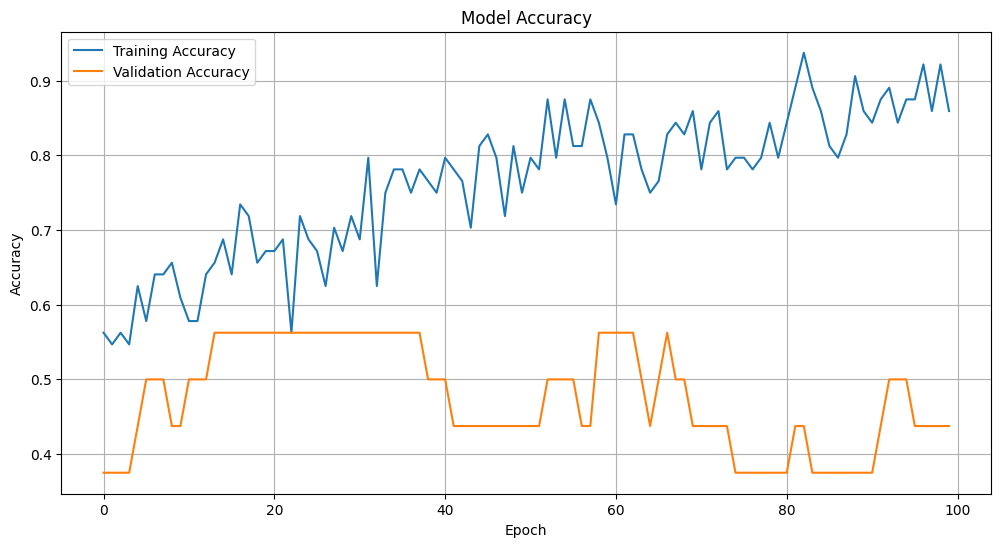

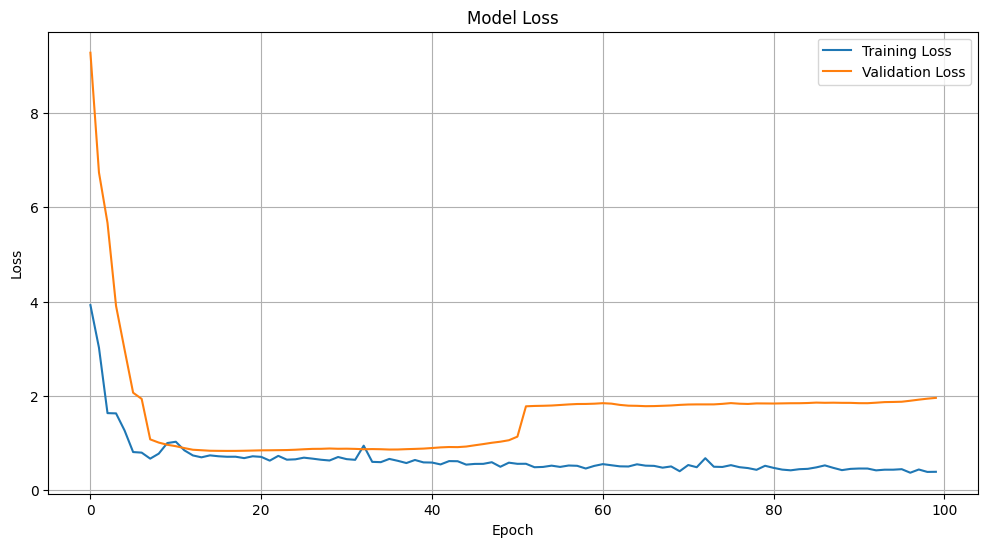

In [ ]:
#1
import matplotlib.pyplot as plt

# Misalnya, `history` adalah variabel hasil dari model.fit()
history_data = history.history

# Membuat plot akurasi
plt.figure(figsize=(12, 6))
plt.plot(history_data['accuracy'], label='Training Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Membuat plot loss
plt.figure(figsize=(12, 6))
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6230 - loss: 0.7494 - val_accuracy: 0.3750 - val_loss: 0.8631
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6274 - loss: 0.7348 - val_accuracy: 0.3750 - val_loss: 0.8826
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6625 - loss: 0.7033 - val_accuracy: 0.3750 - val_loss: 0.8950
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6032 - loss: 0.7148 - val_accuracy: 0.3750 - val_loss: 0.8966
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6541 - loss: 0.7235 - val_accuracy: 0.3750 - val_loss: 0.9044


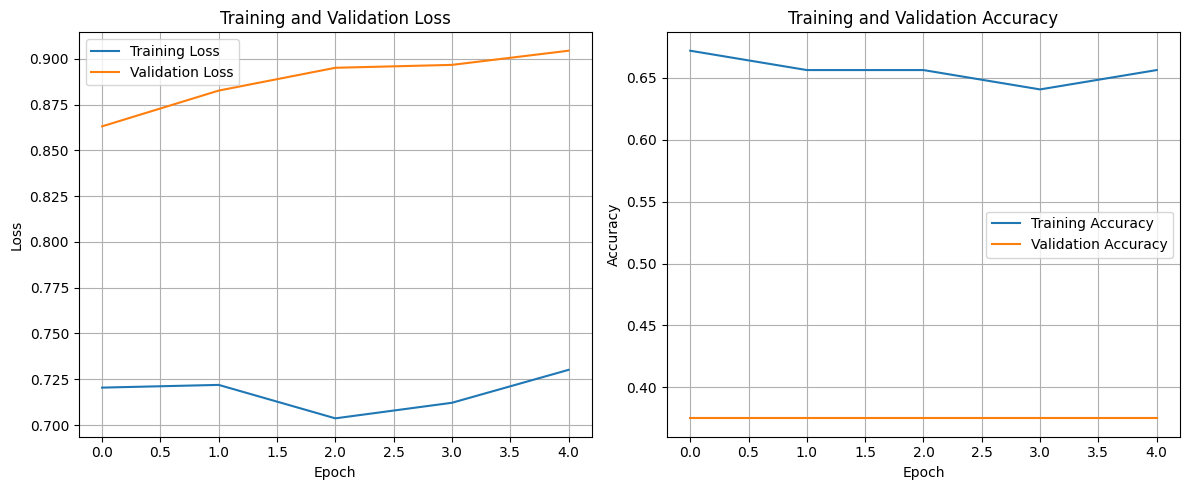

In [ ]:
# history = model.fit(
#     [user_train, item_train], y_train,
#     validation_split=0.2,
#     epochs=100,
#     batch_size=8,
#     callbacks=[early_stopping]
# )

import matplotlib.pyplot as plt

# Simpan history dari model.fit
history = model.fit(
    [user_train, item_train], y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping]
)

# Fungsi untuk plot loss dan accuracy
def plot_training_history(history):
    # Plot Loss
    plt.figure(figsize=(12, 5))

    # Subplot untuk Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Subplot untuk Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Tampilkan plot
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan plot
plot_training_history(history)



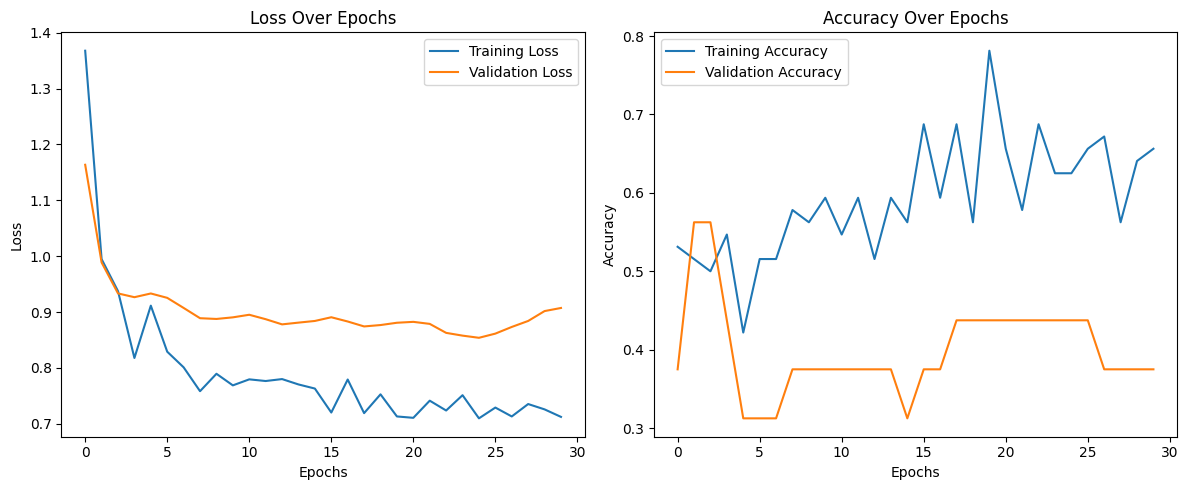

In [ ]:
# Fungsi untuk membuat plot dari history
def plot_training_history(history):
    # Plot loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Panggil fungsi plot
plot_training_history(history)

In [ ]:
# # Public tests
# from public_tests import *
# test_tower(user_NN)
# test_tower(item_NN)

In [ ]:
# # Dummy input data
# user_input = np.random.rand(1, num_user_features)
# item_input = np.random.rand(1, num_item_features)

# # Test user and item models
# user_output = user_NN(user_input)
# item_output = item_NN(item_input)

# print("User model output shape:", user_output.shape)
# print("Item model output shape:", item_output.shape)

In [ ]:
# 1. Bangun model
# user_input = tf.keras.layers.Input(shape=(7,))
# user_embedding = tf.keras.layers.Dense(32, activation='relu')(user_input)
# user_NN = tf.keras.Model(user_input, user_embedding)

# item_input = tf.keras.layers.Input(shape=(3,))
# item_embedding = tf.keras.layers.Dense(32, activation='relu')(item_input)
# item_NN = tf.keras.Model(item_input, item_embedding)

In [ ]:
# # 2. Bangun kombinasi model
# combined_user_item = tf.keras.layers.Concatenate()([user_NN.output, item_NN.output])
# output = tf.keras.layers.Dense(1)(combined_user_item)
# model = tf.keras.Model([user_NN.input, item_NN.input], output)


hampir ga perlu

In [ ]:
# tf.random.set_seed(1)
# cost_fn = tf.keras.losses.MeanSquaredError()
# opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer=opt,
#               loss=cost_fn)

In [ ]:
# print(user_train_numeric.shape)
# print(item_train_numeric.shape)
# print(y_train.shape)

In [ ]:
# user_train_numeric_subset = user_train_numeric.iloc[:4, u_s:]
# item_train_numeric_subset = item_train_numeric.iloc[:4, i_s:]
# y_train_subset = y_train[:4]


In [ ]:
# print(user_train_numeric_subset.shape)
# print(item_train_numeric_subset.shape)


In [ ]:
# # Tambahkan dua kolom dummy untuk memenuhi 4 fitur
# item_train_numeric["dummy1"] = 0.0
# item_train_numeric["dummy2"] = 0.0


In [ ]:
# user_train_numeric_subset = user_train_numeric.iloc[:, -4:]
# item_train_numeric_subset = item_train_numeric.iloc[:, -4:]


In [ ]:
# user_train_numeric_subset = user_train_numeric.iloc[:4, u_s:]  # Hanya kolom relevan
# item_train_numeric_subset = item_train_numeric.iloc[:4, :4]  # Memastikan memiliki 4 kolom


In [ ]:
# # Import necessary libraries
# import tensorflow as tf

# # Assuming user_train_numeric and item_train_numeric are your original dataframes
# # Replace these with your actual dataframe names if different

# # Extract subsets of data for training
# # Adjust the slicing based on your desired subset
# user_train_numeric_subset = user_train_numeric.iloc[:4, -4:]  # Select first 4 rows and last 4 columns
# item_train_numeric_subset = item_train_numeric.iloc[:4, -4:]  # Select first 4 rows and last 4 columns

# # ... (rest of your code, including model definition and compilation)

# # Set random seed for reproducibility
# tf.random.set_seed(1)

# # Fit the model
# model.fit([user_train_numeric_subset, item_train_numeric_subset], y_train_subset, epochs=30)

In [ ]:
# Import necessary libraries
# import tensorflow as tf
# import pandas as pd # Import pandas to work with DataFrames

# Assuming user_train_numeric and item_train_numeric are your original dataframes
# Replace these with your actual dataframe names if different
# Create example DataFrames - Replace with your actual data loading




# Extract subsets of data for training
# Adjust the slicing based on your desired subset
# user_train_numeric_subset = user_train_numeric.iloc[:4, :7]  # Select first 4 rows and last 4 columns
# item_train_numeric_subset = item_train_numeric.iloc[:4, :4]  # Select first 4 rows and last 4 columns

# ... (rest of your code, including model definition and compilation)

# Set random seed for reproducibility
#tf.random.set_seed(1)

# Fit the model
# model.fit([user_train_numeric_subset, item_train_numeric_subset], y_train_subset, epochs=30) # Assuming y_train_subset and model are defined elsewhere

In [ ]:
# print(user_train_numeric_subset.shape)  # Harus (4, 7)
# print(item_train_numeric_subset.shape)  # Harus (4, 4)
# print(y_train_subset.shape)  # Harus (4,)


In [ ]:
# import tensorflow as tf
# import pandas as pd
# import numpy as np

# # ... (your existing code to create user_train_numeric and item_train_numeric) ...

# # Assuming your model needs 7 features from the 'user' data,
# # Adjust the slicing to select the correct columns
# # The error was here. Instead of selecting all 7 features/columns for the user data,
# # only the last 4 were being selected due to user_train_numeric.iloc[:4, -4:]
# user_train_numeric_subset = user_train_numeric.iloc[:4, :7]  # Select first 4 rows and the first 7 columns

# #Assuming your model needs 4 features from the 'item' data,
# # Adjust the slicing to select the correct columns
# item_train_numeric_subset = item_train_numeric.iloc[:4, :4] # Select first 4 rows and the first 4 columns

# # ... (rest of your code) ...

# # Create a sample target variable (replace with your actual target data)
# y_train_subset = np.array([1, 0, 1, 0])

# # Set random seed for reproducibility
# tf.random.set_seed(1)

# # Fit the model
# model.fit([user_train_numeric_subset, item_train_numeric_subset], y_train_subset, epochs=30)

In [ ]:
# import tensorflow as tf
# import pandas as pd
# import numpy as np

# # ... (your existing code to create user_train_numeric and item_train_numeric) ...

# # Assuming your model needs 7 features from the 'user' data,
# # Adjust the slicing to select the correct columns
# # user_train_numeric_subset = user_train_numeric.iloc[:4, :7]  # Select first 4 rows and the first 7 columns

# #Assuming your model needs 4 features from the 'item' data,
# # Adjust the slicing to select the correct columns
# # item_train_numeric_subset = item_train_numeric.iloc[:4, :4] # Select first 4 rows and the first 4 columns

# # ... (rest of your code) ...

# # Create a sample target variable (replace with your actual target data)
# y_train_subset = np.array([1, 0, 1, 0])

# # Set random seed for reproducibility
# tf.random.set_seed(1)

# num_user_features = user_train_numeric_subset.shape[1]
# num_item_features = item_train_numeric_subset.shape[1]


# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# # Fit the model
# model.fit([user_train_numeric_subset, item_train_numeric_subset], y_train_subset, epochs=30)

In [ ]:
# import tensorflow as tf
# import pandas as pd
# import numpy as np # Import numpy for numerical operations

# # ... (your existing code to create user_train_numeric_subset and item_train_numeric_subset) ...

# # Create a sample target variable (replace with your actual target data)
# y_train_subset = np.array([1, 0, 1, 0]) # Example: 4 target values

# # Set random seed for reproducibility
# tf.random.set_seed(1)

# # Fit the model
# model.fit([user_train_numeric_subset, item_train_numeric_subset], y_train_subset, epochs=30)

In [ ]:
# tf.random.set_seed(1)
# # Lalu gunakan kolom numerik untuk model
# model.fit([user_train_numeric.iloc[:, u_s:], item_train_numeric.iloc[:, i_s:]], y_train, epochs=30)


In [ ]:
# model.evaluate([user_test[:, u_s:], item_test[:, i_s:]], y_test)

In [ ]:
# # Konversi user_test dan item_test menjadi NumPy array numerik
# user_test_np = user_test.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy().astype('float32')
# item_test_np = item_test.apply(pd.to_numeric, errors='coerce').fillna(0).to_numpy().astype('float32')

# # Konversi y_test jika diperlukan
# y_test_np = np.array(y_test).astype('float32')

# # Evaluasi model
# model.evaluate([user_test_np[:, u_s:], item_test_np[:, i_s:]], y_test_np)

# # Adjust slicing for user and item features
# user_test_np_subset = user_test_np[:, :7]  # Select first 7 columns for user features
# item_test_np_subset = item_test_np[:, :4]  # Select first 4 columns for item features

# # Evaluate model
# model.evaluate([user_test_np_subset, item_test_np_subset], y_test_np)

# Pastikan user_test dan item_test sudah berupa numpy.ndarray
# Jika sudah numpy.ndarray, langsung gunakan:
user_test_np = np.nan_to_num(user_test).astype('float32')  # Mengganti NaN dengan 0 dan memastikan tipe float32
item_test_np = np.nan_to_num(item_test).astype('float32')

# Konversi y_test jika diperlukan
y_test_np = np.array(y_test).astype('float32')

# Pastikan slicing sesuai dengan jumlah fitur model
# Sesuaikan jumlah fitur berdasarkan input model
num_user_features = 7  # Misalnya jumlah fitur untuk user
num_item_features = 4  # Misalnya jumlah fitur untuk item

user_test_np_subset = user_test_np[:, :num_user_features]
item_test_np_subset = item_test_np[:, :num_item_features]

# Evaluasi model dengan subset fitur yang sesuai
model.evaluate([user_test_np_subset, item_test_np_subset], y_test_np)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 2, 20
'y' sizes: 2
